# **Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import plotly.express as px

# Ignore all warnings
warnings.filterwarnings('ignore')


# Load the datasets
crimes_df = pd.read_csv('/kaggle/input/crimes-against-women-in-india-2001-2021/CrimesOnWomenData.csv')
description_df = pd.read_csv('/kaggle/input/crimes-against-women-in-india-2001-2021/description.csv')

# Display the first few rows of each dataset
print("CrimesOnWomenData.csv - First 5 Rows:")
print(crimes_df.head())

print("\nDescription.csv - First 5 Rows:")
print(description_df.head())


CrimesOnWomenData.csv - First 5 Rows:
   Unnamed: 0              State  Year  Rape   K&A   DD   AoW   AoM    DV  WT
0           0     ANDHRA PRADESH  2001   871   765  420  3544  2271  5791   7
1           1  ARUNACHAL PRADESH  2001    33    55    0    78     3    11   0
2           2              ASSAM  2001   817  1070   59   850     4  1248   0
3           3              BIHAR  2001   888   518  859   562    21  1558  83
4           4       CHHATTISGARH  2001   959   171   70  1763   161   840   0

Description.csv - First 5 Rows:
   Unnamed: 0 Column Names         Explanation
0           0        State               State
1           1         Year                Year
2           2         Rape   No. of Rape cases
3           3          K&A  Kidnap And Assault
4           4           DD        Dowry Deaths


# **Data cleaning**

In [2]:
# Create a dictionary for column renaming
column_names = {
    'Rape': 'Rape Cases',
    'K&A': 'Kidnap and Assault',
    'DD': 'Dowry Deaths',
    'AoW': 'Assault on Women',
    'AoM': 'Assault on Minors',
    'DV': 'Domestic Violence',
    'WT': 'Witchcraft'
}

# Rename columns in the dataset
crimes_df.rename(columns=column_names, inplace=True)

# Check the renamed columns
print("\nRenamed Columns:")
print(crimes_df.columns)



Renamed Columns:
Index(['Unnamed: 0', 'State', 'Year', 'Rape Cases', 'Kidnap and Assault',
       'Dowry Deaths', 'Assault on Women', 'Assault on Minors',
       'Domestic Violence', 'Witchcraft'],
      dtype='object')


In [3]:
# Drop the unnecessary columns
crimes_df_cleaned = crimes_df.drop(columns=['Unnamed: 0'])

# Check the cleaned DataFrame
print("\nCleaned Dataset Columns:")
print(crimes_df_cleaned.columns)
print("\nFirst 5 Rows of the Cleaned Dataset:")
print(crimes_df_cleaned.head())


Cleaned Dataset Columns:
Index(['State', 'Year', 'Rape Cases', 'Kidnap and Assault', 'Dowry Deaths',
       'Assault on Women', 'Assault on Minors', 'Domestic Violence',
       'Witchcraft'],
      dtype='object')

First 5 Rows of the Cleaned Dataset:
               State  Year  Rape Cases  Kidnap and Assault  Dowry Deaths  \
0     ANDHRA PRADESH  2001         871                 765           420   
1  ARUNACHAL PRADESH  2001          33                  55             0   
2              ASSAM  2001         817                1070            59   
3              BIHAR  2001         888                 518           859   
4       CHHATTISGARH  2001         959                 171            70   

   Assault on Women  Assault on Minors  Domestic Violence  Witchcraft  
0              3544               2271               5791           7  
1                78                  3                 11           0  
2               850                  4               1248           0  
3 

In [4]:
# Dataset info
print("\nCleaned Dataset Info:")
crimes_df_cleaned.info()

# Summary statistics
print("\nSummary Statistics:")
print(crimes_df_cleaned.describe(include='all'))
print(crimes_df_cleaned.isnull().sum())


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               736 non-null    object
 1   Year                736 non-null    int64 
 2   Rape Cases          736 non-null    int64 
 3   Kidnap and Assault  736 non-null    int64 
 4   Dowry Deaths        736 non-null    int64 
 5   Assault on Women    736 non-null    int64 
 6   Assault on Minors   736 non-null    int64 
 7   Domestic Violence   736 non-null    int64 
 8   Witchcraft          736 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 51.9+ KB

Summary Statistics:
                    State         Year   Rape Cases  Kidnap and Assault  \
count                 736   736.000000   736.000000          736.000000   
unique                 70          NaN          NaN                 NaN   
top     Arunachal Pradesh          NaN          

# **Exploratory data analysis**

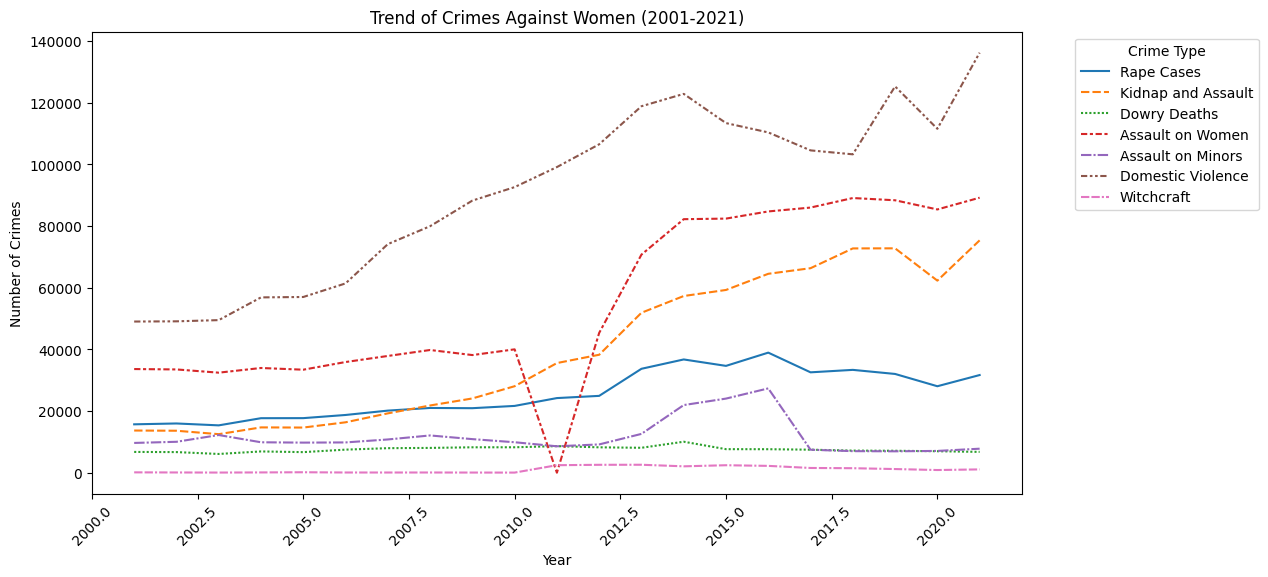

In [5]:

# Group by year and sum up all crime types
crime_trend = crimes_df_cleaned.groupby('Year').sum()

# Plotting the trend of different crimes over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=crime_trend)
plt.title('Trend of Crimes Against Women (2001-2021)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<Figure size 1200x600 with 0 Axes>

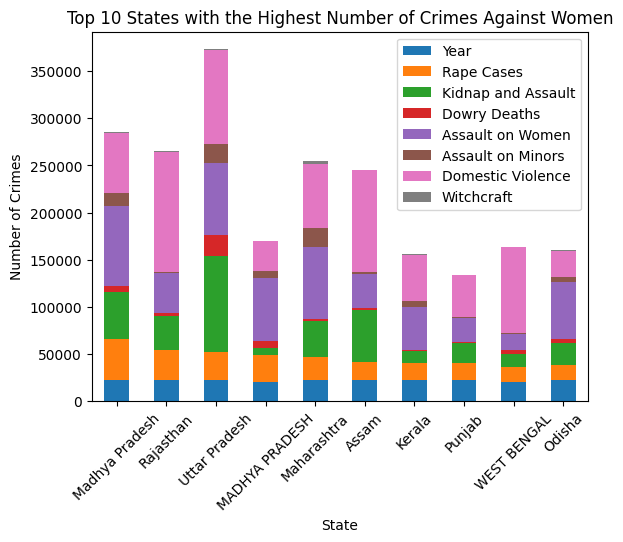

In [6]:
# Total crimes by state
state_crime = crimes_df_cleaned.groupby('State').sum().sort_values(by='Rape Cases', ascending=False)

# Top 10 states with the highest number of crimes
top_states = state_crime.head(10)

plt.figure(figsize=(12, 6))
top_states.plot(kind='bar', stacked=True)
plt.title('Top 10 States with the Highest Number of Crimes Against Women')
plt.xlabel('State')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()


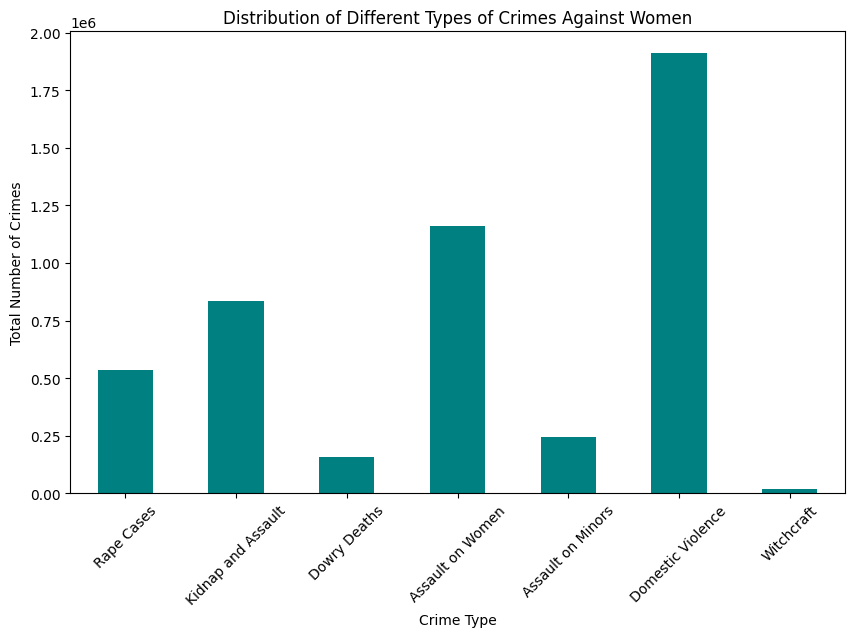

In [7]:
# Sum up all crimes to get a sense of distribution
crime_distribution =crimes_df_cleaned.drop(['State', 'Year'], axis=1).sum()

plt.figure(figsize=(10, 6))
crime_distribution.plot(kind='bar', color='teal')
plt.title('Distribution of Different Types of Crimes Against Women')
plt.xlabel('Crime Type')
plt.ylabel('Total Number of Crimes')
plt.xticks(rotation=45)
plt.show()


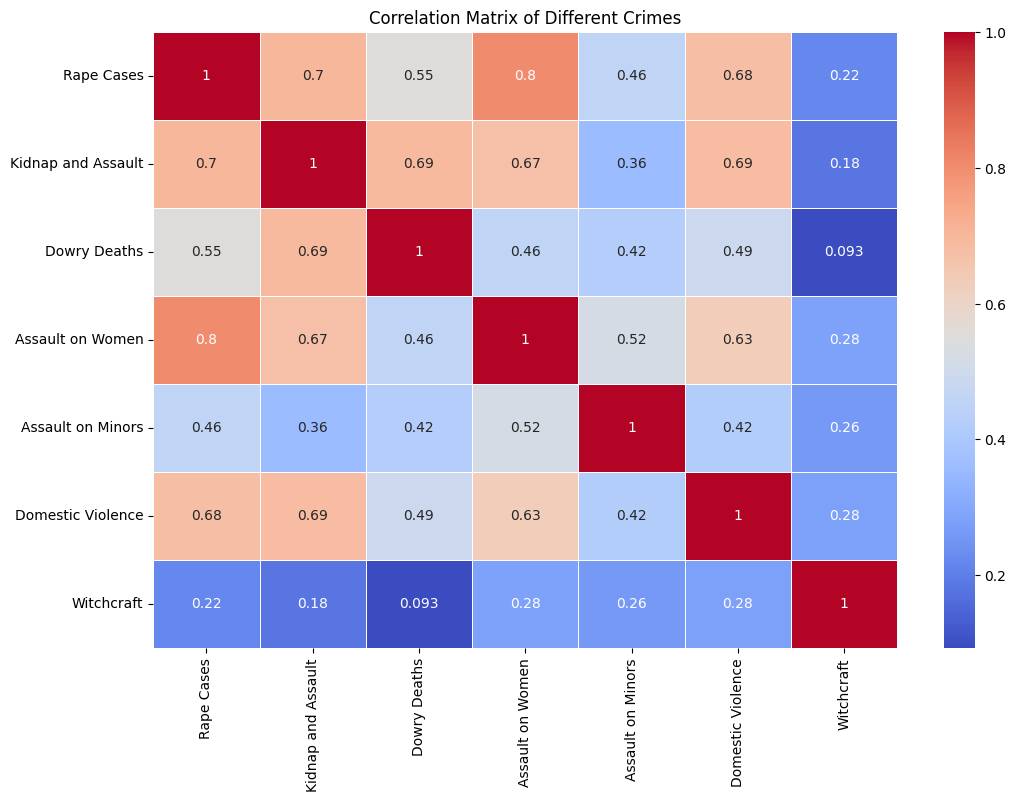

In [8]:
plt.figure(figsize=(12, 8))
correlation_matrix = crimes_df_cleaned.drop(['State', 'Year'], axis=1).corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Different Crimes')
plt.show()


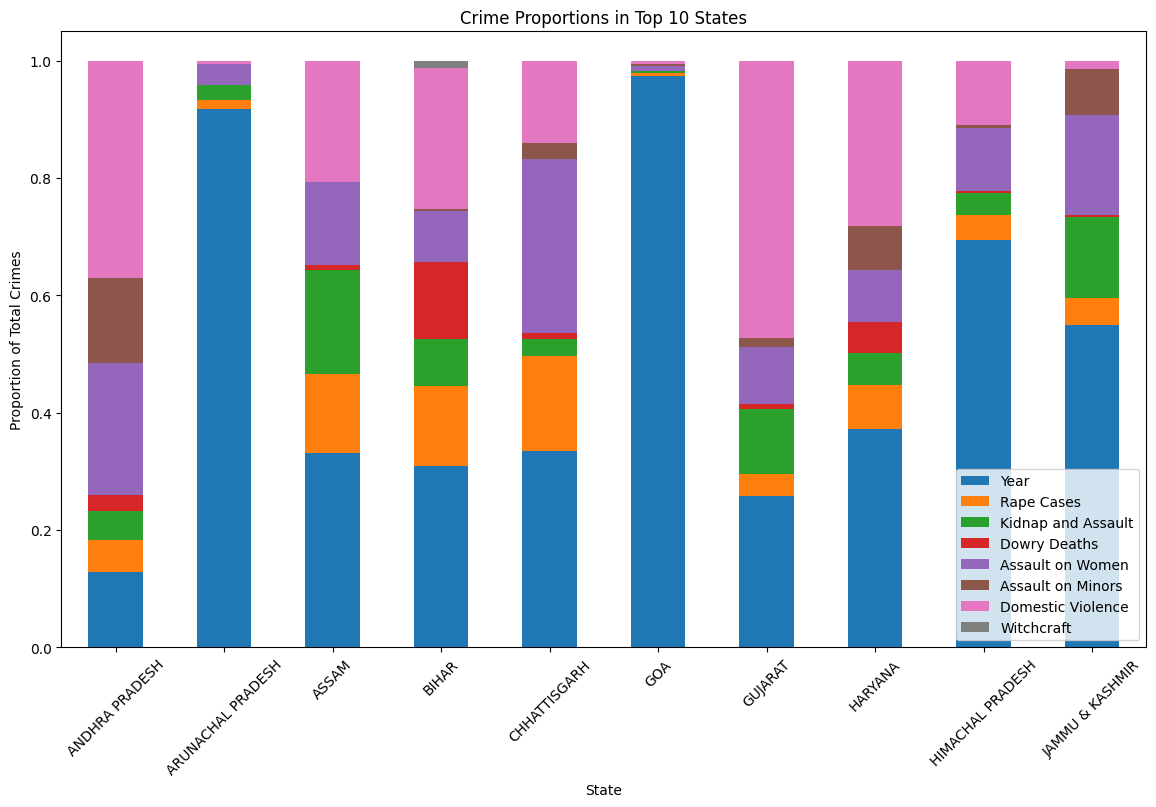

In [9]:
# Calculate the proportion of each crime type within each state
state_crime_proportions = crimes_df_cleaned.set_index('State').div(crimes_df_cleaned.set_index('State').sum(axis=1), axis=0)

# Plot the proportions for the top 10 states
top_states = state_crime_proportions.head(10)
top_states.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Crime Proportions in Top 10 States')
plt.xlabel('State')
plt.ylabel('Proportion of Total Crimes')
plt.xticks(rotation=45)
plt.show()


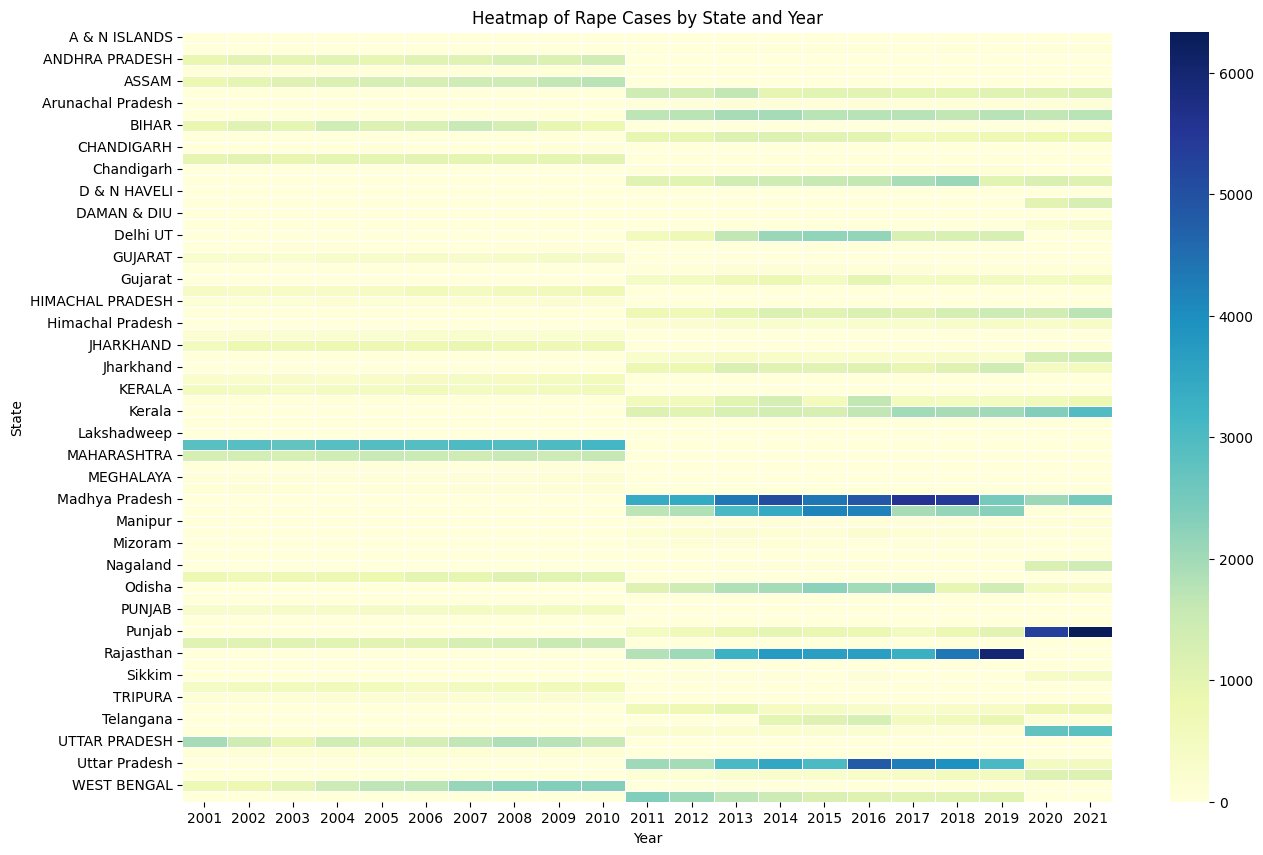

In [10]:
# Pivot the data for heatmap
heatmap_data = crimes_df_cleaned.pivot_table(values='Rape Cases', index='State', columns='Year', aggfunc='sum', fill_value=0)

plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", linecolor='white', linewidths=0.5)
plt.title('Heatmap of Rape Cases by State and Year')
plt.xlabel('Year')
plt.ylabel('State')
plt.show()


<Figure size 1400x800 with 0 Axes>

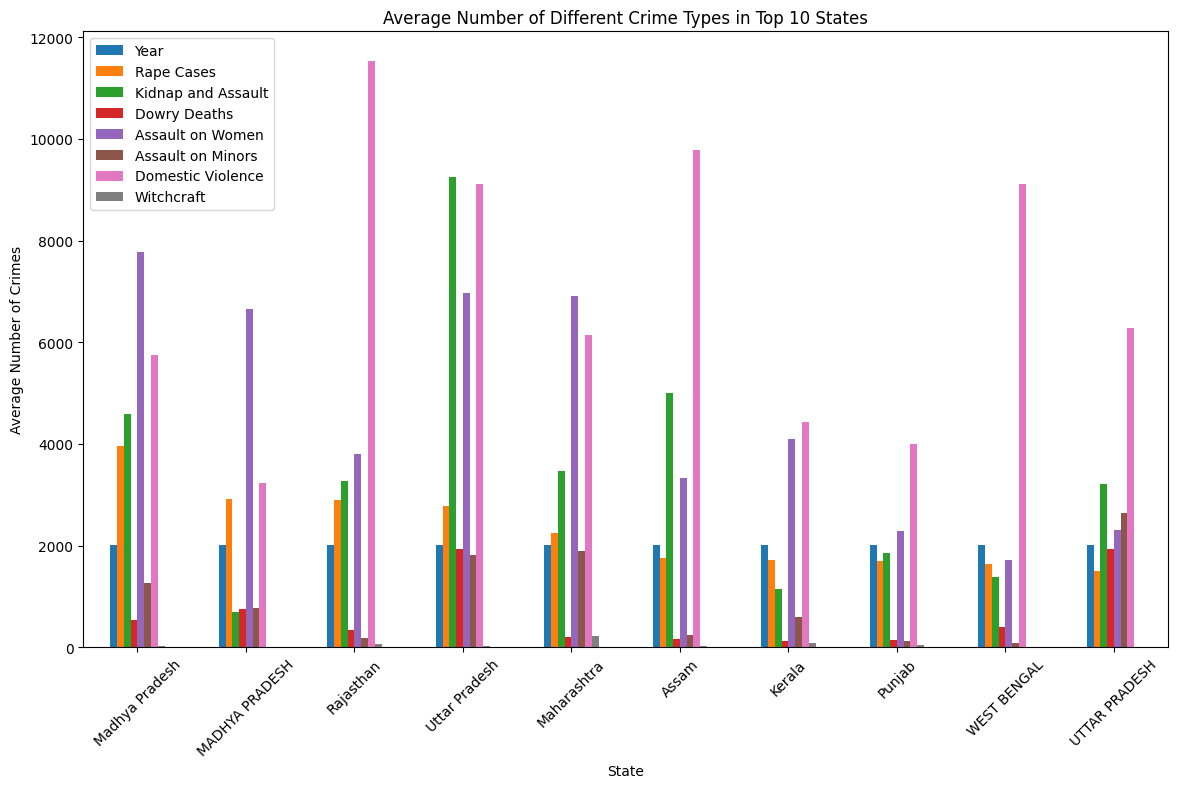

In [11]:
# Calculate the mean number of each crime type for the top 10 states with the highest total crime numbers
top_states_mean_crime = crimes_df_cleaned.groupby('State').mean().sort_values(by='Rape Cases', ascending=False).head(10)

# Plot the comparison
plt.figure(figsize=(14, 8))
top_states_mean_crime.plot(kind='bar', figsize=(14, 8))
plt.title('Average Number of Different Crime Types in Top 10 States')
plt.xlabel('State')
plt.ylabel('Average Number of Crimes')
plt.xticks(rotation=45)
plt.show()


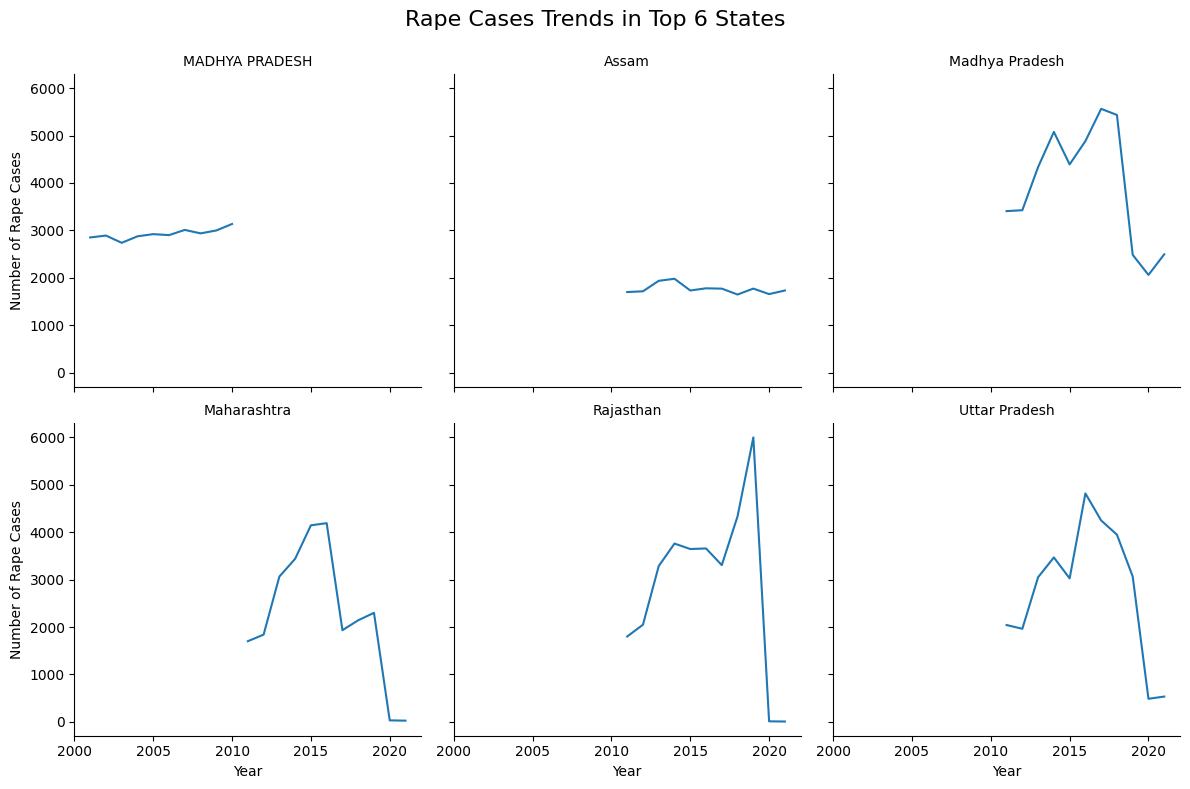

In [12]:
import seaborn as sns

# Select top N states by total crime numbers
top_n_states = crimes_df_cleaned.groupby('State').sum().nlargest(6, 'Rape Cases').index

# Filter data for these states
filtered_df = crimes_df_cleaned[crimes_df_cleaned['State'].isin(top_n_states)]

# Create a facet grid to show trends over the years
g = sns.FacetGrid(filtered_df, col="State", col_wrap=3, height=4)
g.map(sns.lineplot, 'Year', 'Rape Cases')
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Number of Rape Cases")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Rape Cases Trends in Top 6 States', fontsize=16)
plt.show()


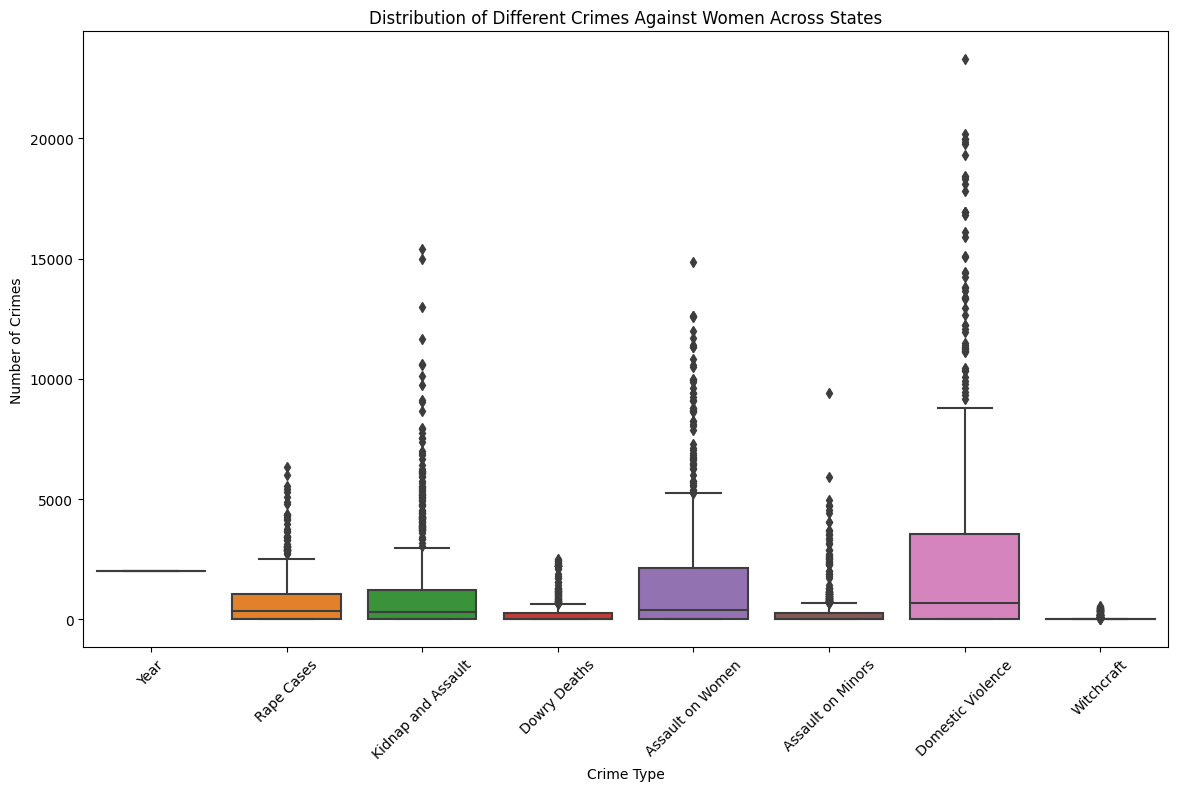

In [13]:
# Melt the DataFrame to plot multiple crime types
melted_df = crimes_df_cleaned.melt(id_vars=['State'], var_name='Crime Type', value_name='Number of Crimes')

plt.figure(figsize=(14, 8))
sns.boxplot(x='Crime Type', y='Number of Crimes', data=melted_df)
plt.title('Distribution of Different Crimes Against Women Across States')
plt.xticks(rotation=45)
plt.show()


In [14]:
import plotly.express as px
import pandas as pd

# Create a scatter plot with states on the x-axis and a dummy y-axis (for visualization purposes)
fig = px.scatter(crimes_df_cleaned, 
                 x="State", 
                 y=[0]*len(crimes_df_cleaned),  # Dummy Y axis
                 size="Rape Cases", 
                 color="Rape Cases", 
                 hover_name="State", 
                 title="Rape Cases in India by State",
                 size_max=100,
                 color_continuous_scale=px.colors.sequential.Viridis)  # Change color scale here

fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))

# Increase plot width
fig.update_layout(yaxis=dict(visible=False), 
                  xaxis=dict(tickangle=45), 
                  showlegend=False,
                  width=1200)  # Adjust width here

fig.show()


In [15]:

# Scatter plot to visualize the relationship
fig = px.scatter(crimes_df_cleaned, 
                 x='Domestic Violence', 
                 y='Rape Cases', 
                 title="Relationship Between Domestic Violence and Rape Cases",
                 labels={'Domestic Violence': 'Domestic Violence Cases', 'Rape Cases': 'Rape Cases'},
                 trendline='ols',  # Optional: Add a trendline
                 trendline_color_override="red")

fig.update_traces(marker=dict(size=10, opacity=0.7, line=dict(width=1, color='DarkSlateGrey')))
fig.show()


# **Models**

In [16]:
#Regression
# Prepare the dataset
X = crimes_df_cleaned[['Year', 'Kidnap and Assault', 'Dowry Deaths', 
                       'Assault on Women', 'Assault on Minors', 
                       'Domestic Violence', 'Witchcraft']]
y = crimes_df_cleaned['Rape Cases']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")


Mean Absolute Error: 276.8589216426442
R^2 Score: 0.6926719130461758


In [17]:
#Random Forest
# Prepare the dataset
X = crimes_df_cleaned[['Year', 'Kidnap and Assault', 'Dowry Deaths', 
                       'Assault on Women', 'Assault on Minors', 
                       'Domestic Violence', 'Witchcraft']]
y = crimes_df_cleaned['Rape Cases']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest - Mean Absolute Error: {mae}")
print(f"Random Forest - R² Score: {r2}")


Random Forest - Mean Absolute Error: 138.95131221719458
Random Forest - R² Score: 0.8577575820724136


In [18]:
#Gradient Boosting Machines (GBM)

# Train the model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = gb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Gradient Boosting - Mean Absolute Error: {mae}")
print(f"Gradient Boosting - R² Score: {r2}")


Gradient Boosting - Mean Absolute Error: 141.64775857242353
Gradient Boosting - R² Score: 0.8958584995562717


In [19]:
#XGBoost

# Convert dataset to DMatrix (XGBoost-specific data structure)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Parameters for XGBoost
params = {'objective': 'reg:squarederror', 'max_depth': 6, 'learning_rate': 0.1, 'n_estimators': 100}

# Train the model
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# Predict and evaluate
y_pred = xgb_model.predict(dtest)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost - Mean Absolute Error: {mae}")
print(f"XGBoost - R² Score: {r2}")


XGBoost - Mean Absolute Error: 139.1563309932726
XGBoost - R² Score: 0.8545084413818513


# Feature importance

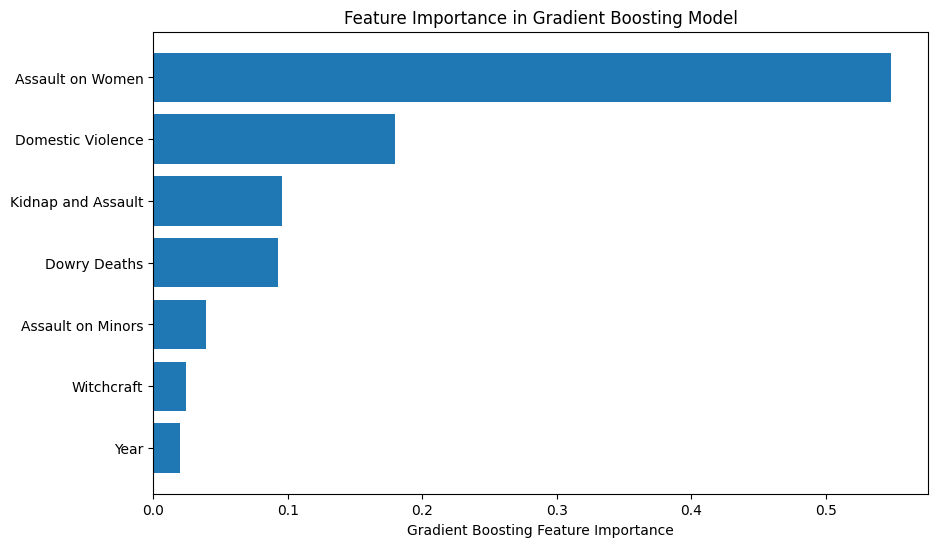

In [20]:

# Feature importance
feature_importance = gb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Gradient Boosting Feature Importance")
plt.title("Feature Importance in Gradient Boosting Model")
plt.show()
